# Evaluación Preliminar del Conjunto de Datos: Microsoft Security Incident Prediction

Este notebook presenta un análisis del conjunto de datos `Microsoft.csv`, que proviene del proyecto GUIDE de Microsoft, el cual busca mejorar la predicción de incidentes de ciberseguridad a través del uso de técnicas de machine learning. Este conjunto de datos representa una colección amplia de incidentes de seguridad.

In [1]:
!pip install kagglehub --quiet


In [3]:
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

file_path = kagglehub.dataset_download("Microsoft/microsoft-security-incident-prediction")
#print("Path to dataset files:", file_path)

A continuación, procederemos a obtener los datos. En primer lugar, destacar que en el dataset original existen dos tipos de archivos: train y test. Dado que estos datasets son muy grandes, vamos a particionarlos y tomar una muestra de ellos. Para lograr esto, cogeremos unas cuatro mil filas de manera aleatoria a lo largo del archivo. En este caso, tomaremos la muestra inicial del archivo GUIDE_TEST.

In [4]:
dataset_folder = os.getcwd()
reduced_file_path = os.path.join(dataset_folder, 'microsoft_Reduced.csv')

if not os.path.exists(reduced_file_path):
    file_path = kagglehub.dataset_download("Microsoft/microsoft-security-incident-prediction")

    original_file_path = os.path.join(file_path, "GUIDE_Test.csv")
    df_original = pd.read_csv(original_file_path)

    print(f"El archivo original tiene {len(df_original)} filas.")

    # Realizar undersampling estratificado
    df_reduced, _ = train_test_split(
        df_original,
        train_size=10000,  # Tamaño del conjunto reducido
        stratify=df_original['IncidentGrade'],  # Cambia por tu columna de objetivo
        random_state=42
    )

    df_reduced.to_csv(reduced_file_path, index=False)
    print(f"Archivo reducido creado con {len(df_reduced)} filas manteniendo proporciones de clases.")
    
else:
    df_reduced = pd.read_csv(reduced_file_path)
    print(f"Archivo cargado con {len(df_reduced)} filas.")

print(df_reduced.head())

Archivo cargado con 10000 filas.
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   764504183844     46        2165   464218  2024-06-06T17:32:50.000Z   
1   335007450291    358       81220    23843  2024-06-08T19:59:54.000Z   
2  1468878815912    171      337929   433815  2024-06-13T21:39:26.000Z   
3   704374638571    158      278841  1448996  2024-06-05T15:45:39.000Z   
4   523986014933    295        1723   226867  2024-06-08T23:20:44.000Z   

   DetectorId  AlertTitle       Category MitreTechniques   IncidentGrade  ...  \
0         217         194      Execution             NaN    TruePositive  ...   
1           1           1  InitialAccess       T1566.002   FalsePositive  ...   
2         862        7604   Exfiltration             NaN  BenignPositive  ...   
3        3745       22159   Exfiltration             NaN   FalsePositive  ...   
4           1           1  InitialAccess       T1566.002   FalsePositive  ...   

  Roles OSFamily OSVersion Antispam

### Descripción del conjunto de datos


In [6]:

reduced_df = df_reduced
reduced_df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,764504183844,46,2165,464218,2024-06-06T17:32:50.000Z,217,194,Execution,NaN,TruePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
1,335007450291,358,81220,23843,2024-06-08T19:59:54.000Z,1,1,InitialAccess,T1566.002,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
2,1468878815912,171,337929,433815,2024-06-13T21:39:26.000Z,862,7604,Exfiltration,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
3,704374638571,158,278841,1448996,2024-06-05T15:45:39.000Z,3745,22159,Exfiltration,NaN,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,523986014933,295,1723,226867,2024-06-08T23:20:44.000Z,1,1,InitialAccess,T1566.002,FalsePositive,...,NaN,5,66,NaN,NaN,Malicious,242,1445,10630,Private


In [8]:
print("describe")
reduced_df.describe(include="all").T

describe


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,4000.0,NaN,NaN,NaN,838551564936.384766,494497178135.138245,88.0,403726927653.0,833223657069.0,1271310322906.5,1709396988493.0
OrgId,4000.0,NaN,NaN,NaN,164.20175,341.620872,0.0,8.0,41.0,162.0,4528.0
IncidentId,4000.0,NaN,NaN,NaN,67740.325,118151.769876,3.0,436.0,8368.0,79328.75,581642.0
AlertId,4000.0,NaN,NaN,NaN,403715.56575,454603.925981,0.0,22269.25,215892.5,657320.75,1717417.0
Timestamp,4000,3842,2024-06-11T22:02:45.000Z,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DetectorId,4000.0,NaN,NaN,NaN,98.60325,366.345306,0.0,2.0,8.0,39.25,8009.0
AlertTitle,4000.0,NaN,NaN,NaN,2544.42325,10664.879668,0.0,2.0,10.0,127.25,112427.0
Category,4000,18,InitialAccess,1854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MitreTechniques,1694,104,T1078;T1078.004,571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IncidentGrade,4000,3,BenignPositive,1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Obtener el tipo de cada variable
variable_types = reduced_df.dtypes
print("Tipos de cada variable:")
print(variable_types)


Tipos de cada variable:
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily           object
FileName        

In [10]:
# Verificar valores faltantes en cada columna
missing_values = reduced_df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
MitreTechniques       2306
IncidentGrade            0
ActionGrouped         3999
ActionGranular        3999
EntityType               0
EvidenceRole             0
DeviceId                 0
Sha256                   0
IpAddress                0
Url                      0
AccountSid               0
AccountUpn               0
AccountObjectId          0
AccountName              0
DeviceName               0
NetworkMessageId         0
EmailClusterId        3968
RegistryKey              0
RegistryValueName        0
RegistryValueData        0
ApplicationId            0
ApplicationName          0
OAuthApplicationId       0
ThreatFamily          3980
FileName                 0
FolderPath               0
ResourceIdName           0
ResourceType          39

### Descripción del conjunto de datos

Antes de proceder con los siguinetes apartados, comentar que nuestra tarea principal es predecir etiquetas de triage (clasificaciones) de incidentes: True Positive (TP), Benign Positive (BP) y False Positive (FP).
True Positive son aquellos que representan una amenaza real que ha sido correctamente identificada y clasificada como tal por el sistema.
Benign Positive son aquellos que fueron inicialmente identificados como amenazas, pero que en realidad son falsos positivos.
False Positive son aquellos que el modelo identifica incorrectamente como amenazas. Visto esto, creemos que este problema se debe resolver mediante clasificación.

En primer lugar, es importante destacar que en nuestro conjunto de datos existen variables numéricas y variables categóricas. Algunas de estas variables tienen missing values; en las siguientes secciones, analizaremos cómo tratar estos casos.

Por otro lado, también hay variables que no son necesarias para nuestro modelo. Esto se debe a que estos datos son una colección de incidentes y la organización que recolecta, ha incluido identificadores y otros datos relevantes para identificar cada incidente. Por ejemplo, entre otras, no necesitamos el ID del incidente para nuestro análisis.

Var objetivo : IncidentGrade

In [7]:
print(reduced_df.shape)

(10000, 46)


In [8]:
# Eliminaremos ciertas variables que no tienen nada que ver con el incidente en si.

variables_a_eliminar = [
    'Id',                     # Identificador único para cada par OrgId-IncidentId (no necesario para el modelo)
    'DeviceId',               # Identificador único del dispositivo (no aporta información relevante)
    'IncidentId',             # Identificador único del incidente (no útil para el modelo)
    'AlertId',                # Identificador único de la alerta (no útil para la clasificación)
    'ApplicationId',          # Identificador único de la aplicación (no es útil para la clasificación)
    'EmailClusterId',         # Identificador único para el clúster de correos electrónicos (no necesario)
    'NetworkMessageId',       # Identificador a nivel de red para mensajes (no relevante para el análisis)
    'Sha256',                 # Hash SHA-256 de archivos (no aporta información clasificatoria)
    'AccountSid',             # Identificador de cuenta de on-premises (no es necesario)
    'AccountObjectId',        # Identificador de objeto de cuenta en Entra ID (no útil para el modelo)
    'OAuthApplicationId',     # Identificador de aplicación OAut
    'ResourceIdName',         # Nombre del recurso de Azure 
    'ResourceType',           # Tipo de recurso de Azure
]

# Eliminar las variables del DataFrame
reduced_cleaned_df = reduced_df.drop(columns=variables_a_eliminar, errors='ignore')

# Mostrar el DataFrame limpio
print("Variables eliminadas. El DataFrame limpio tiene las siguientes columnas:")
print(reduced_cleaned_df.columns)

Variables eliminadas. El DataFrame limpio tiene las siguientes columnas:
Index(['OrgId', 'Timestamp', 'DetectorId', 'AlertTitle', 'Category',
       'MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular',
       'EntityType', 'EvidenceRole', 'IpAddress', 'Url', 'AccountUpn',
       'AccountName', 'DeviceName', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationName', 'ThreatFamily', 'FileName',
       'FolderPath', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City',
       'Usage'],
      dtype='object')


In [9]:
# Obtener el tipo de cada variable
variable_types = reduced_cleaned_df.dtypes
print("Tipos de cada variable:")
print(variable_types)


Tipos de cada variable:
OrgId                 int64
Timestamp            object
DetectorId            int64
AlertTitle            int64
Category             object
MitreTechniques      object
IncidentGrade        object
ActionGrouped        object
ActionGranular       object
EntityType           object
EvidenceRole         object
IpAddress             int64
Url                   int64
AccountUpn            int64
AccountName           int64
DeviceName            int64
RegistryKey           int64
RegistryValueName     int64
RegistryValueData     int64
ApplicationName       int64
ThreatFamily         object
FileName              int64
FolderPath            int64
Roles                object
OSFamily              int64
OSVersion             int64
AntispamDirection    object
SuspicionLevel       object
LastVerdict          object
CountryCode           int64
State                 int64
City                  int64
Usage                object
dtype: object


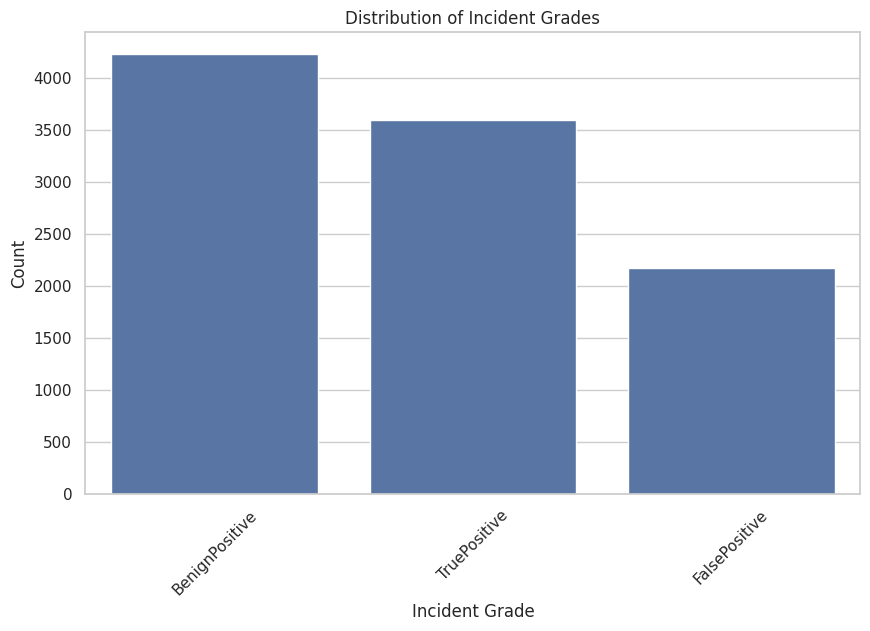

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Count plot for the IncidentGrade
plt.figure(figsize=(10, 6))
sns.countplot(data=reduced_cleaned_df, x='IncidentGrade', order=reduced_cleaned_df['IncidentGrade'].value_counts().index)
plt.title('Distribution of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Matriz de correlación de las variables

Se calcula y visualiza la matriz de correlación para analizar la relación entre variables numéricas. Esto ayuda a detectar posibles multicolinealidades y elegir características relevantes.


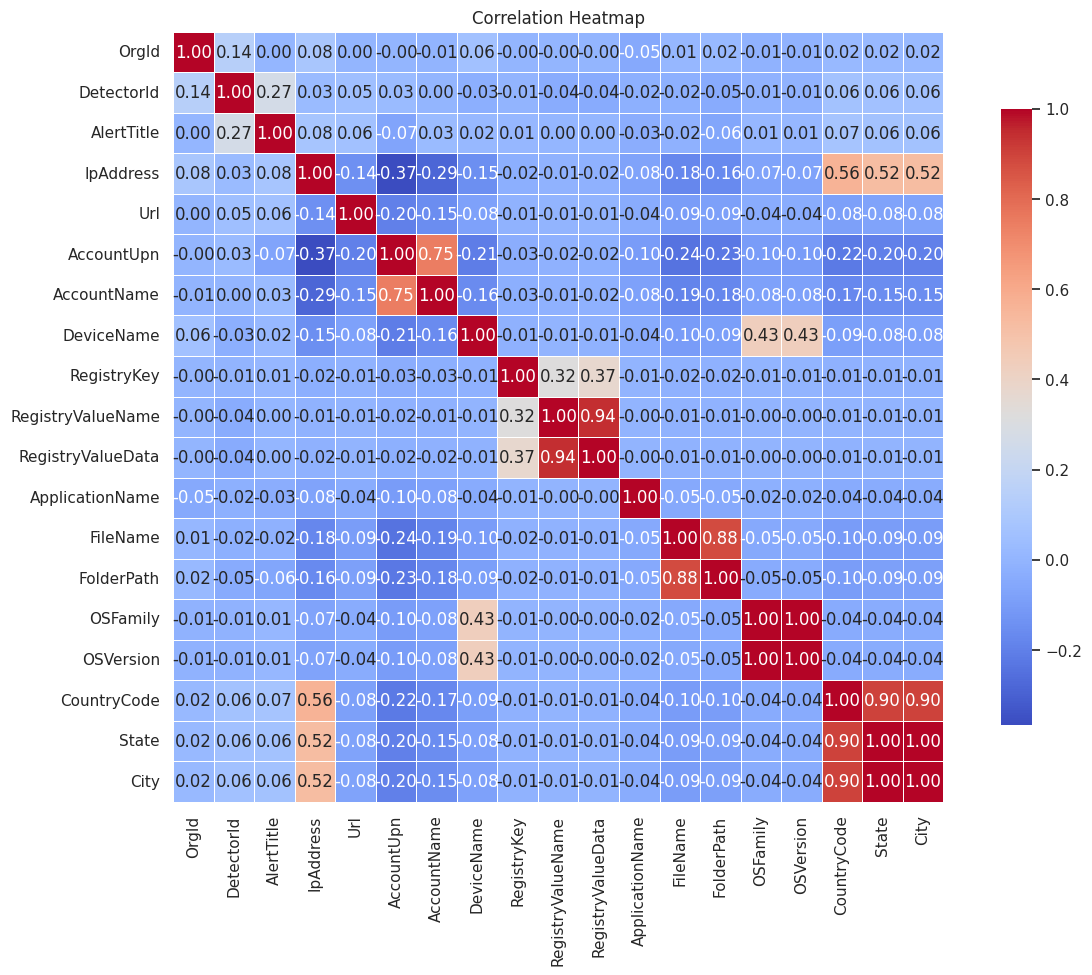

In [11]:
numeric_df = reduced_cleaned_df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            cbar_kws={"shrink": .8}, 
            linewidths=0.5) 

plt.title('Correlation Heatmap')

plt.show()


Dado que es un ejemplo de clasificacion, intentar trazar una regresion sobre la variable objetivo (categorica) es complicado

## Regresion Logistica Basica

Necesitamos que las variables estan todas en numericas y estandarizadas para poder aplicar una regresion logistica 

El código realiza la preparación de datos para un modelo de clasificación.

Separa las características del conjunto de datos y la variable objetivo, convirtiendo las variables categóricas en formato numérico mediante One-Hot Encoding. 

Después, divide los datos en conjuntos de entrenamiento y prueba, estandariza las características numéricas, y combina estos datos escalados con las variables categóricas, creando conjuntos listos para el modelado.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

df = reduced_cleaned_df
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train_scaled = X_train[numeric_cols].copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])  # Ajusta y transforma
X_test_scaled = X_test[numeric_cols].copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])  # Solo transforma

X_train_final = pd.concat([X_train_scaled, X_train.drop(columns=numeric_cols)], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test.drop(columns=numeric_cols)], axis=1)


Lo diguiente implementa un modelo de regresión logística para clasificar los datos. Primero, crea y ajusta el modelo con el conjunto de entrenamiento, y luego realiza predicciones sobre el conjunto de prueba.

Finalmente, evalúa el rendimiento del modelo calculando la precisión, la matriz de confusión y un informe de clasificación que resume el desempeño en cada clase.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000) 

model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 0.69
Confusion Matrix:
[[734  24  55]
 [213 152  98]
 [217  14 493]]
Classification Report:
                precision    recall  f1-score   support

BenignPositive       0.63      0.90      0.74       813
 FalsePositive       0.80      0.33      0.47       463
  TruePositive       0.76      0.68      0.72       724

      accuracy                           0.69      2000
     macro avg       0.73      0.64      0.64      2000
  weighted avg       0.72      0.69      0.67      2000



Precisión del modelo: 68%.